# K-Means Clustering

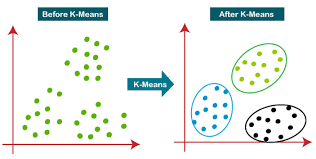

K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct, non-overlapping groups or clusters.

1. **Objective**: The primary goal of k-means clustering is to group data points into k clusters, where each cluster represents a collection of data points that are more similar to each other than to those in other clusters.

2. **Initialization**: The algorithm starts by randomly selecting k data points as initial cluster centroids. These centroids serve as the centers of the initial clusters.

3. **Assignment**: Each data point is assigned to the cluster whose centroid is closest to it. The "closeness" is typically measured using Euclidean distance, but other distance metrics can be used.

4. **Update Centroids**: After all data points are assigned to clusters, the centroids are recalculated as the mean of all data points in their respective clusters.

5. **Iteration**: Steps 3 and 4 are repeated iteratively until convergence, meaning that the assignment of data points to clusters and the recalculation of centroids no longer change significantly.

6. **Result**: The final result is a set of k clusters, each represented by its centroid, and each data point belongs to one of these clusters.

7. **Choosing k**: One challenge in k-means clustering is determining the optimal value of k, the number of clusters. This can be done using techniques like the elbow method, silhouette analysis, or domain knowledge.

8. **Applications**: K-means clustering is widely used in various fields such as image segmentation, customer segmentation, anomaly detection, and more.

Remember that while k-means is effective for many datasets, it has limitations, such as sensitivity to initial centroid selection and assumptions about cluster shapes. It's essential to preprocess data appropriately and consider other clustering algorithms depending on the characteristics of the dataset.

In this notebook, we will make a K-Means Clustering Algorithm from scratch similar using this source:

https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670

To assess the performance of our algorithm, we will initially create a dataset featuring groups in a two-dimensional space. The make_blobs function from ```sklearn.datasets``` generates groupings with 2-dimensional normal distributions and assigns labels indicating the respective group to each data point.

In [1]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from typing import List, Tuple
from scipy.spatial.distance import euclidean
import numpy as np
from sklearn.cluster import KMeans

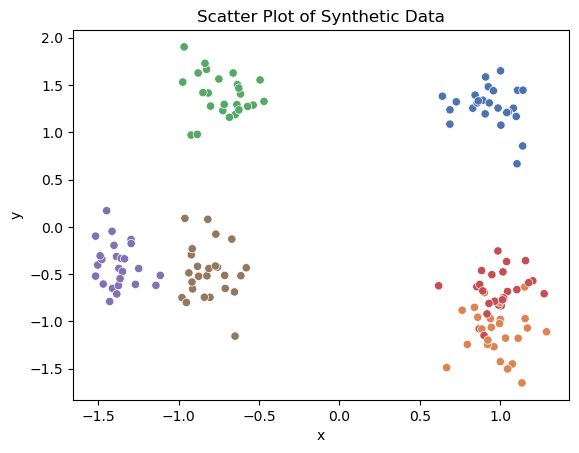

In [2]:
# Specify the number of centers, random state, and number of samples
centers = 6
random_state = 24
num_samples = 150

# Generate synthetic data using make_blobs with specified parameters
X_train, true_labels = make_blobs(n_samples=num_samples, centers=centers, random_state=random_state)

# Standardize the data
X_train = StandardScaler().fit_transform(X_train)

# Plot the scatter plot
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Synthetic Data")
plt.show()

In the course of this algorithm, it will be necessary to compute distances between a specific point and a dataset of points on multiple occasions. To facilitate this, let's establish a function dedicated to calculating Euclidean distances.

In [3]:
import numpy as np

def calculate_euclidean_distance(point, data):
    """
    Compute the Euclidean distance between a point and a dataset.
    
    Parameters:
    - point: Array with dimensions (m,)
    - data: Array with dimensions (n, m)
    
    Returns:
    - distances: Array of size (n,) containing the Euclidean distances between the point and each data point.
    """
    
    distances = np.sqrt(np.sum((point - data)**2, axis=1))
    return distances

## Implementation

### ```class KMeans```

Initially, the k-means clustering algorithm is set up with a specified value for k and a maximum iteration limit to determine the optimal centroid positions. Without imposing a maximum iteration constraint during the centroid optimization process, there exists a potential risk of encountering an infinite loop.

### ```def __init__( ):```

This ```__init__``` method is the constructor for the KMeans class. When an instance of the KMeans class is created, this method is automatically called. It initializes the instance with the specified parameters or uses default values if none are provided.

### ```def fit( ):```

The ```fit``` method in the KMeans class is implementing the training process for the KMeans clustering algorithm. 

1. Initialization of Centroids:
    * The method starts by initializing the centroids using the "k-means++" method. It randomly selects one data point from the training data (```X_train```) as the first centroid.
    
2. Selecting Additional Centroids:
    * It then iteratively selects the remaining centroids by calculating distances from each data point to the current centroids, normalizing these distances, and choosing the next centroid based on these normalized distances.
    
3. Iterations to Adjust Centroids:
    * After initializing centroids, it enters a loop to iteratively adjust the centroids until convergence or until the maximum number of iterations (```max_iter```) is reached.
    * Within each iteration, it assigns each data point to the nearest centroid, calculates new centroids as the mean of the data points assigned to them, and checks for convergence by comparing with the previous centroids.
    
4. Convergence Criteria:
    * The convergence is determined by checking whether any centroid has changed in position from the previous iteration. If there are no changes or if the maximum number of iterations is reached, the loop exits.
    
This process is essentially the training phase of the KMeans algorithm, where centroids are adjusted iteratively to minimize the distance between data points and their assigned centroids. The final positions of the centroids represent the centers of the clusters in the data.

### ```def evaluate( ):```

The ```evaluate``` method in the ```KMeans``` class is designed to assess the KMeans model's performance on a given set of data points (```X```). 

1. Input Parameters:
    * ```X```: A list of NumPy arrays representing data points. Each element in the list is a data point that the KMeans model will be evaluated on.

2. Initialization:
    * ```centroids```: An empty list that will store the centroids corresponding to each data point after evaluation.
    * ```centroid_idxs```: An empty list that will store the indices of centroids for each data point.

3. Evaluation Loop:
    * The method iterates over each data point (```x```) in the input data (```X```).
    * For each data point, it calculates the distances from that point to the centroids of the KMeans model using the Euclidean distance measure.

4. Assigning Centroids:
    * It then finds the index of the nearest centroid for the current data point (```centroid_idx```), which is the centroid with the minimum Euclidean distance.
    * The centroid and its index are appended to the respective lists (```centroids``` and ```centroid_idxs```).

5. Return Statement:
    * The method returns a tuple containing two lists:
    * ```centroids```: A list of NumPy arrays representing the centroids corresponding to each data point.
    * ```centroid_idxs```: A list of integers representing the indices of centroids for each data point.

In [4]:
class KMeans:
    """
    KMeans clustering algorithm implementation.

    Parameters:
    - n_clusters (int, optional): Number of clusters. Default is 8.
    - max_iter (int, optional): Maximum number of iterations. Default is 300.
    """

    def __init__(self, n_clusters=8, max_iter=300):
        """
        Initialize KMeans instance.

        Parameters:
        - n_clusters (int, optional): Number of clusters. Default is 8.
        - max_iter (int, optional): Maximum number of iterations. Default is 300.
        """
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train: List[np.ndarray]):
        """
        Fit the KMeans model to the training data.

        Parameters:
        - X_train (List[np.ndarray]): Training data, where each element is a data point represented as a NumPy array.
        """
        
        # Initialize the centroids, using the "k-means++" method
        initial_centroid_idx = np.random.choice(range(len(X_train)), size=1)[0]
        self.centroids = [X_train[initial_centroid_idx]]

        # Selecting additional centroids
        for _ in range(self.n_clusters - 1):
            # Calculate distances from points to the centroids
            dists = np.sum([calculate_euclidean_distance(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]
            self.centroids += [X_train[new_centroid_idx]]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = np.zeros_like(self.centroids)
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = calculate_euclidean_distance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            for i, cluster in enumerate(sorted_points):
                if cluster:
                    self.centroids[i] = np.mean(cluster, axis=0)
                else:
                    # Re-initialize empty cluster with a random data point
                    new_centroid_idx = np.random.choice(range(len(X_train)), size=1)[0]
                    self.centroids[i] = X_train[new_centroid_idx]
            iteration += 1

    def evaluate(self, X: List[np.ndarray]) -> Tuple[List[np.ndarray], List[int]]:
        """
        Evaluate the KMeans model on the given data.

        Parameters:
        - X (List[np.ndarray]): Data to be evaluated, where each element is a data point represented as a NumPy array.

        Returns:
        - Tuple[List[np.ndarray], List[int]]: A tuple containing two lists - the centroids and the indices of centroids for each data point.
        """
        centroids = []      # List to store the centroids corresponding to each data point
        centroid_idxs = []  # List to store the indices of centroids for each data point

        # Iterate over each data point in the input data
        for x in X:
            # Calculate distances from the data point to the centroids
            dists = calculate_euclidean_distance(x, self.centroids)

            # Find the index of the nearest centroid
            centroid_idx = np.argmin(dists)

            # Append the centroid and its index to the respective lists
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs

Now we can finally deploy the model. Let's train and test it on the original dataset and observe the results. We'll maintain the original method of plotting the data, by distinguishing the true labels by color. Additionally, we'll use different marker styles to represent the predicted labels, providing insights into the model's performance.

Try running this code block a few times to see how the model is doing.

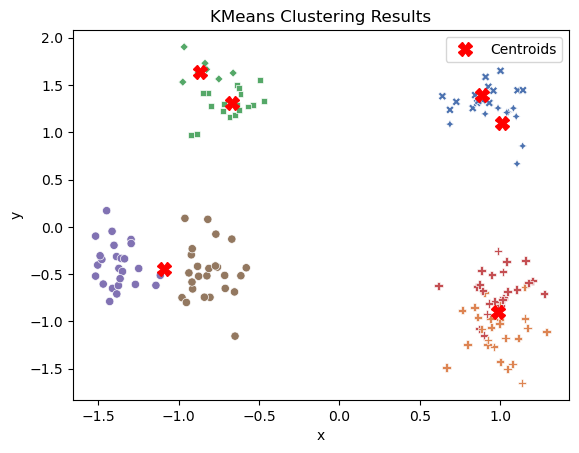

In [5]:
# Fit the KMeans model
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# Evaluate the KMeans model
class_centers, classification = kmeans.evaluate(X_train)

# Plot the scatter plot with original data points
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )

# Plot the centroids with a distinctive marker
plt.plot([centroid[0] for centroid in kmeans.centroids],
         [centroid[1] for centroid in kmeans.centroids],
         'X',  # Use a distinctive marker for centroids
         markersize=10,
         color='red',  # Color for centroids
         label='Centroids'
         )

plt.xlabel("x")
plt.ylabel("y")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

## Re-evaluating Centroid Initialization

Oh boy! The model isn't exact every time **:(**

We can deduce two main issues from the unsuccessful instances above:
1. When a centroid is initialized far from any clusters, it is unlikely to undergo significant movement.
2. If centroids are initialized in close proximity, they are unlikely to exhibit substantial divergence from one another. 

Let's see how well this model is against Python's built-in KMeans function. 

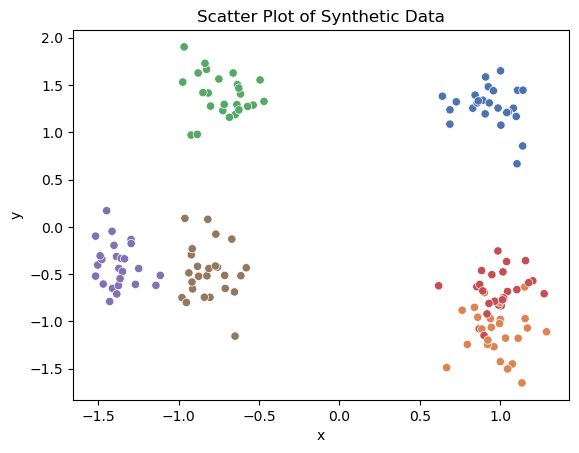

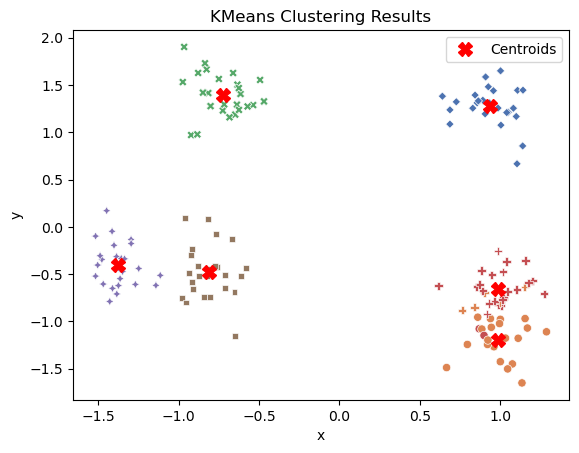

In [6]:
from sklearn.cluster import KMeans  

# Specify the number of centers, random state, and number of samples
centers = 6
random_state = 24
num_samples = 150

# Generate synthetic data using make_blobs with specified parameters
X_train, true_labels = make_blobs(n_samples=num_samples, centers=centers, random_state=random_state)

# Standardize the data
X_train = StandardScaler().fit_transform(X_train)

# Plot the scatter plot
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                palette="deep",
                legend=None
                )
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Synthetic Data")
plt.show()

# Use scikit-learn KMeans
kmeans = KMeans(n_clusters=centers, random_state=random_state)
kmeans.fit(X_train)

# Get the labels and cluster centers
classification = kmeans.labels_
class_centers = kmeans.cluster_centers_

# Plot the scatter plot with original data points
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )

# Plot the centroids with a distinctive marker
plt.plot(class_centers[:, 0],
         class_centers[:, 1],
         'X',  # Use a distinctive marker for centroids
         markersize=10,
         color='red',  # Color for centroids
         label='Centroids'
         )

plt.xlabel("x")
plt.ylabel("y")
plt.title("KMeans Clustering Results")
plt.legend()
plt.show()

# Conclusion

The provided code implements the KMeans clustering algorithm from scratch and demonstrates its application on synthetic data. The code includes a class structure for KMeans, handling centroid initialization using the "k-means++" method, and iterative centroid adjustment. Furthermore, the script visualizes the clustering results by plotting the original data points, color-coded by true labels, and styled based on their assigned clusters. The centroids are marked with a distinctive marker, providing a clear representation of the clustering outcome. This comprehensive implementation and visualization allow for a better understanding of the KMeans algorithm and its performance on the given dataset.